In [1]:
import numpy as np
from datetime import datetime
import numpy as np
import urllib.request

In [2]:
page = urllib.request.urlopen("http://mgr.imces.ru/stdpub/mgr-baikal/hsg-irkutsk/48E8746F34325647_171025_162506.gr2")
f = open("test.txt", "w")
content = page.read()
numpy_data_polojitelnie = np.frombuffer(content, dtype = np.dtype('B')).reshape(int(len(content)/12),12)
numpy_data_otrisatelnie = np.frombuffer(content, dtype = np.dtype('b')).reshape(int(len(content)/12),12)
f.close()
gr2 = 12
length_column = int(len(content) / gr2) -  1 #(вычитаем первую строку так как в этой строке  допольнителные данные )
# print(numpy_data_polojitelnie)
# print(numpy_data_otrisatelnie)

In [3]:
print (np.frombuffer(content, dtype = np.dtype('B')).reshape(int(len(content)/12),12))

[[ 71  82  48 ...  50  86  71]
 [212  57 155 ...   0 210   0]
 [ 16  58 155 ...   0 221   0]
 ...
 [ 72 107 155 ...   0 202   0]
 [132 107 155 ...   0   6   1]
 [192 107 155 ...   0 200   0]]


In [4]:
numpy_date = np.array(numpy_data_polojitelnie[1:,:4], dtype=np.uint32)
numpy_H1_amp_count = numpy_data_polojitelnie[1:,4:6]
numpy_H1_amplituda = numpy_data_polojitelnie[1:,6:8]
numpy_H2_amp_count = numpy_data_polojitelnie[1:,8:10]
numpy_H2_amplituda = numpy_data_polojitelnie[1:,10:12]

# print (numpy_date)

# print(numpy_H1_amp_count)
#print (numpy_H1_amplituda)

# print(numpy_H2_amp_count)
#print(numpy_H2_amplituda)


In [5]:
# Funksiya kotoraya vozrshayet vremya v sekundax iz pervoy stolbsa
def date_v_sekundax(massiv): 
    
    s = np.zeros(length_column, dtype='uint64')
    for i in range(length_column):
        s[i] = massiv[i,3] * (pow(16,6)) +  massiv[i,1] * (pow(16,4)) +massiv[i,2] * (pow(16,2)) +  massiv[i,0]
    return s      

In [6]:
array_date_v_sekundax= date_v_sekundax(numpy_date)

In [7]:
#array_date_v_sekundax

In [8]:
# Funksiya kotoraya vozrshayet vremya v obichnom formate
def data_obichniy_format(massiv): 
    s = np.zeros(length_column, dtype='<U40') #"<U36"dlina simvolov
    for i in range(len(massiv)):
        s[i] = datetime.fromtimestamp(massiv[i] -2209032000).strftime("%A, %B %d, %Y %I:%M:%S")
    return s    

In [9]:
array_date_obichniy_format = data_obichniy_format(array_date_v_sekundax)

In [10]:
# Funksiya obyedinyayet 2 stolbsa i vozvrashayet massiv desyaterichnom vide
def func_join_2_column(massiv): 
    s = np.zeros(length_column, dtype='uint32')
    for i in range(length_column):
        s[i] = massiv[i,0]  +  massiv[i,1] * 16
    return s      

In [11]:
array_H1_amp_count = func_join_2_column(numpy_H1_amp_count)
array_H2_amp_count = func_join_2_column(numpy_H2_amp_count)
array_H1_amplituda = func_join_2_column(numpy_H1_amplituda)
array_H2_amplituda = func_join_2_column(numpy_H2_amplituda)

In [12]:
import numpy as np
import pandas as pd
# Creating a 2 dimensional numpy array
data= np.array([array_H1_amp_count,array_H2_amp_count,array_H1_amplituda,array_H2_amplituda])

dataset = pd.DataFrame({'Column1': array_date_obichniy_format, 'Column2':data[0],'Column3':data[1],'Column4':data[2],'Column5':data[3]})
print(dataset)

                                   Column1  Column2  Column3  Column4  Column5
0       Saturday, August 12, 2017 10:23:00      760       31       25      210
1         Sunday, August 13, 2017 04:32:00      666       22       21      221
2         Sunday, August 13, 2017 04:33:00      888       30      252      212
3         Sunday, August 13, 2017 04:34:00      753       14      217       16
4         Sunday, August 13, 2017 04:35:00      882       27       16      200
5         Sunday, August 13, 2017 10:44:00      944       18       45      205
6         Sunday, August 13, 2017 10:45:00      870       33       19      203
7         Sunday, August 13, 2017 10:46:00      904       27       18      203
8         Sunday, August 13, 2017 10:47:00      983       34       22      205
9         Sunday, August 13, 2017 10:48:00      948       38      229      211
10        Monday, August 14, 2017 04:57:00      767        3       20      214
11        Monday, August 14, 2017 04:58:00      699 

In [ ]:
import matplotlib.pyplot as plt

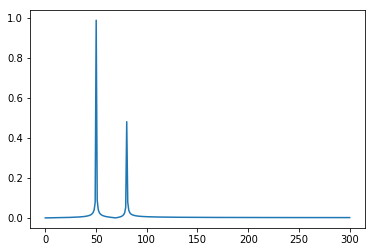

In [43]:
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 600.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

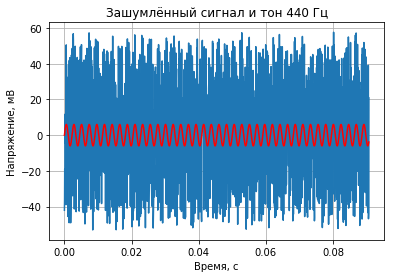

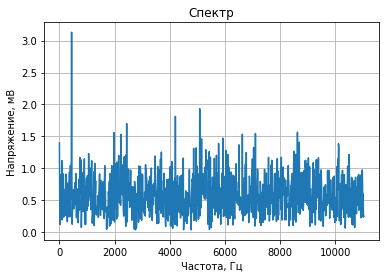

In [62]:
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from numpy.random import uniform
from math import sin, pi
import matplotlib.pyplot as plt
# а можно импортировать numpy и писать: numpy.fft.rfft
FD = 22050 # частота дискретизации, отсчётов в секунду
# а это значит, что в дискретном сигнале представлены частоты от нуля до 11025 Гц (это и есть теорема Котельникова)
N = 2000 # длина входного массива, 0.091 секунд при такой частоте дискретизации
# сгенерируем сигнал с частотой 440 Гц длиной N
pure_sig = array([6.*sin(2.*pi*440.0*t/FD) for t in range(N)])
# сгенерируем шум, тоже длиной N (это важно!)
noise = uniform(-50.,50., N)
# суммируем их и добавим постоянную составляющую 2 мВ (допустим, не очень хороший микрофон попался. Или звуковая карта или АЦП)
sig = pure_sig + noise + 2.0 # в numpy так перегружена функция сложения
# вычисляем преобразование Фурье. Сигнал действительный, поэтому надо использовать rfft, это быстрее, чем fft
spectrum = rfft(sig)

# нарисуем всё это, используя matplotlib
# Сначала сигнал зашумлённый и тон отдельно
plt.plot(arange(N)/float(FD), sig) # по оси времени секунды!
plt.plot(arange(N)/float(FD), pure_sig, 'r') # чистый сигнал будет нарисован красным
plt.xlabel(u'Время, c') # это всё запускалось в Python 2.7, поэтому юникодовские строки
plt.ylabel(u'Напряжение, мВ')
plt.title(u'Зашумлённый сигнал и тон 440 Гц')
plt.grid(True)
plt.show()
# когда закроется этот график, откроется следующий
# Потом спектр
plt.plot(rfftfreq(N, 1./FD), np_abs(spectrum)/N)
# rfftfreq сделает всю работу по преобразованию номеров элементов массива в герцы
# нас интересует только спектр амплитуд, поэтому используем abs из numpy (действует на массивы поэлементно)
# делим на число элементов, чтобы амплитуды были в милливольтах, а не в суммах Фурье. Проверить просто — постоянные составляющие должны совпадать в сгенерированном сигнале и в спектре
plt.xlabel(u'Частота, Гц')
plt.ylabel(u'Напряжение, мВ')
plt.title(u'Спектр')
plt.grid(True)
plt.show()